# HCSC Interview
# VINEET SRIVASTAVA

In [3]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### Data import and exploration

In [45]:
df = pd.read_csv('/content/sample_data/l2_data.csv')
df.head(10)

,physician_id,physician_efficiency,metro_area,physician_working_specialty,physician_gender,physician_credential,physician_med_school,physician_graduation_year,bump_feature,engineered_feature_1,engineered_feature_2,engineered_feature_3,medicare_engineered_1,medicare_engineered_2,medicare_engineered_3,medicare_enginerred_4,medicare_engineered_5,medicare_engineered_6,num_medicare_patients,medicare_patient_hcc_risk_score
0,866,0.10,Chicago,Nephrology,M,UNKNOWN,OTHER,2008.0,12,1.004,1.361,9.7,3.250,3,5,2,1,5,228,5.328
1,4766,0.12,Chicago,Hospital Based Physician,M,UNKNOWN,OTHER,1982.0,15,0.662,0.901,6.0,4.000,4,2,5,5,4,372,2.057
2,7088,0.12,Chicago,Nephrology,F,UNKNOWN,OTHER,2004.0,16,0.227,1.148,0.4,2.750,3,1,4,2,4,339,5.472
3,2808,0.12,Chicago,Nephrology,F,UNKNOWN,"LOYOLA UNIVERSITY OF CHICAGO, STRITCH SCHOOL O...",2013.0,14,0.135,1.060,1.4,4.000,4,3,4,4,5,358,6.300
4,4040,0.13,Dallas,Nephrology,F,UNKNOWN,OTHER,1979.0,17,1.096,1.100,3.3,3.000,3,1,5,4,2,219,3.445
5,9614,0.14,Dallas,Nephrology,F,MD,OTHER,2000.0,21,0.821,0.868,13.7,3.667,4,5,0,1,5,570,4.850
6,7220,0.14,Chicago,Nephrology,F,UNKNOWN,UNIVERSITY OF WISCONSIN MEDICAL SCHOOL,2015.0,20,0.838,1.155,14.9,2.250,2,2,2,3,2,145,5.318
7,2464,0.15,Dallas,Nephrology,M,UNKNOWN,UNIVERSITY OF TEXAS SOUTHWESTERN MEDICAL SCHOO...,2002.0,22,1.087,1.092,5.9,4.250,4,3,5,5,4,532,5.826
8,6896,0.15,Dallas,Cardiovascular - Interventional,U,UNKNOWN,UNKNOWN,NaN,24,1.028,1.087,8.3,1.500,2,1,1,1,3,301,1.806
9,6729,0.16,Chicago,Nephrology,M,MD,OTHER,1987.0,26,0.232,0.495,6.6,2.500,3,1,1,5,3,642,3.893


In [46]:
df.columns

Index(['physician_id', 'physician_efficiency', 'metro_area',
       'physician_working_specialty', 'physician_gender',
       'physician_credential', 'physician_med_school',
       'physician_graduation_year', 'bump_feature', 'engineered_feature_1',
       'engineered_feature_2', 'engineered_feature_3', 'medicare_engineered_1',
       'medicare_engineered_2', 'medicare_engineered_3',
       'medicare_enginerred_4', 'medicare_engineered_5',
       'medicare_engineered_6', 'num_medicare_patients',
       'medicare_patient_hcc_risk_score'],
      dtype='object')

### Lets check the correlation matrix

In [47]:
df.corr() # we see that bump_feature and physician_efficiency is highly correlated as per case-study too

,physician_id,physician_efficiency,physician_graduation_year,bump_feature,engineered_feature_1,engineered_feature_2,engineered_feature_3,medicare_engineered_1,medicare_engineered_2,medicare_engineered_3,medicare_enginerred_4,medicare_engineered_5,medicare_engineered_6,num_medicare_patients,medicare_patient_hcc_risk_score
physician_id,1.000000,-0.000238,-0.032548,0.017047,-0.007993,0.016665,-0.010132,0.016997,0.026023,0.013255,-0.005456,0.002505,0.022504,-0.009264,-0.005672
physician_efficiency,-0.000238,1.000000,0.005756,0.895089,0.261837,0.231081,0.319219,0.086232,0.081228,0.050238,0.021475,0.024428,0.085179,-0.031171,0.091470
physician_graduation_year,-0.032548,0.005756,1.000000,0.005473,-0.007553,-0.014491,0.030026,-0.021640,-0.025640,-0.021449,-0.013962,-0.002357,-0.006758,-0.021742,-0.012147
bump_feature,0.017047,0.895089,0.005473,1.000000,0.246495,0.237638,0.258549,0.086978,0.082613,0.052069,0.010931,0.013268,0.096124,-0.029683,0.087234
engineered_feature_1,-0.007993,0.261837,-0.007553,0.246495,1.000000,0.622483,0.076735,0.019418,0.016153,-0.014070,-0.013700,0.031014,0.053974,0.036927,0.027676
engineered_feature_2,0.016665,0.231081,-0.014491,0.237638,0.622483,1.000000,0.058089,0.029353,0.028360,-0.033377,0.014530,0.005137,0.045034,0.046417,0.082537
engineered_feature_3,-0.010132,0.319219,0.030026,0.258549,0.076735,0.058089,1.000000,0.029102,0.022147,-0.002736,-0.007662,0.012453,0.033376,-0.012552,0.023884
medicare_engineered_1,0.016997,0.086232,-0.021640,0.086978,0.019418,0.029353,0.029102,1.000000,0.949004,0.524464,0.456120,0.411918,0.569762,0.100272,0.111215
medicare_engineered_2,0.026023,0.081228,-0.025640,0.082613,0.016153,0.028360,0.022147,0.949004,1.000000,0.495189,0.446745,0.386648,0.536168,0.104382,0.106882
medicare_engineered_3,0.013255,0.050238,-0.021449,0.052069,-0.014070,-0.033377,-0.002736,0.524464,0.495189,1.000000,0.190693,0.147675,0.171102,-0.085615,0.001334


In [48]:
df['bump_feature'].describe()

count    7393.000000
mean     4948.712836
std      2917.906257
min        12.000000
25%      2348.000000
50%      4943.000000
75%      7545.000000
max      9951.000000
Name: bump_feature, dtype: float64

In [49]:
df['physician_efficiency'].describe()

count    7393.000000
mean        1.056228
std         0.355256
min         0.100000
25%         0.860000
50%         1.010000
75%         1.200000
max         2.990000
Name: physician_efficiency, dtype: float64

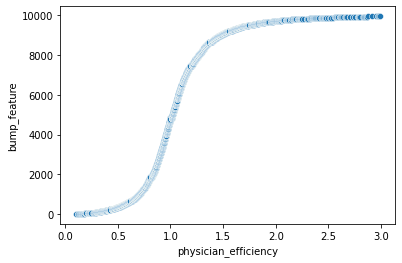

In [50]:
sns.scatterplot(data=df,x='physician_efficiency',y='bump_feature') 

In [51]:
df['physician_efficiency'].unique()

array([0.1 , 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.

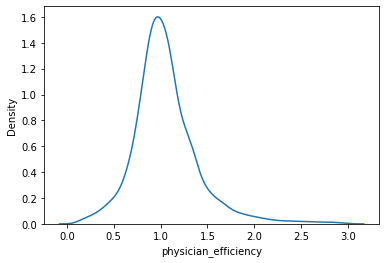

In [52]:
sns.kdeplot(data=df,x='physician_efficiency')

## Lets try to create a target variable of 0s and 1s (0- inefficent and 1- efficient) based on the distribution we have, but first lets normalize the values from 0 to 1, we can use min-max scaler formula for that

In [53]:
normalized_target= df['physician_efficiency'].apply(lambda x: (x-df['physician_efficiency'].min())/(df['physician_efficiency'].max()- df['physician_efficiency'].min()))

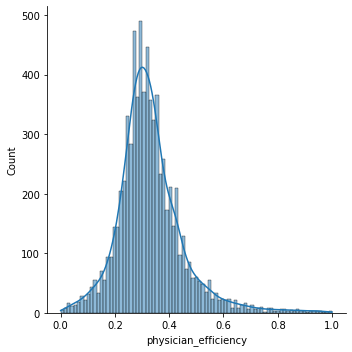

In [54]:
sns.displot(normalized_target,kde=True) # we see that most of the scores are between 0.2-0.6 indicating a high % age of inefficient scores/physician

In [55]:
normalized_target.unique()

array([0.        , 0.00692042, 0.01038062, 0.01384083, 0.01730104,
       0.02076125, 0.02422145, 0.02768166, 0.03114187, 0.03460208,
       0.04152249, 0.0449827 , 0.04844291, 0.05190311, 0.05536332,
       0.05882353, 0.06228374, 0.06574394, 0.06920415, 0.07266436,
       0.07612457, 0.07958478, 0.08304498, 0.08650519, 0.0899654 ,
       0.09342561, 0.09688581, 0.10034602, 0.10380623, 0.10726644,
       0.11072664, 0.11418685, 0.11764706, 0.12110727, 0.12456747,
       0.12802768, 0.13148789, 0.1349481 , 0.1384083 , 0.14186851,
       0.14532872, 0.14878893, 0.15224913, 0.15570934, 0.15916955,
       0.16262976, 0.16608997, 0.16955017, 0.17301038, 0.17647059,
       0.1799308 , 0.183391  , 0.18685121, 0.19031142, 0.19377163,
       0.19723183, 0.20069204, 0.20415225, 0.20761246, 0.21107266,
       0.21453287, 0.21799308, 0.22145329, 0.22491349, 0.2283737 ,
       0.23183391, 0.23529412, 0.23875433, 0.24221453, 0.24567474,
       0.24913495, 0.25259516, 0.25605536, 0.25951557, 0.26297

In [56]:
df['Target']= normalized_target.apply(lambda x:1 if x>=0.6 else 0) #lets add a column named Target with 0s and 1s

In [57]:
df.head()

,physician_id,physician_efficiency,metro_area,physician_working_specialty,physician_gender,physician_credential,physician_med_school,physician_graduation_year,bump_feature,engineered_feature_1,...,engineered_feature_3,medicare_engineered_1,medicare_engineered_2,medicare_engineered_3,medicare_enginerred_4,medicare_engineered_5,medicare_engineered_6,num_medicare_patients,medicare_patient_hcc_risk_score,Target
0,866,0.10,Chicago,Nephrology,M,UNKNOWN,OTHER,2008.0,12,1.004,...,9.7,3.25,3,5,2,1,5,228,5.328,0
1,4766,0.12,Chicago,Hospital Based Physician,M,UNKNOWN,OTHER,1982.0,15,0.662,...,6.0,4.00,4,2,5,5,4,372,2.057,0
2,7088,0.12,Chicago,Nephrology,F,UNKNOWN,OTHER,2004.0,16,0.227,...,0.4,2.75,3,1,4,2,4,339,5.472,0
3,2808,0.12,Chicago,Nephrology,F,UNKNOWN,"LOYOLA UNIVERSITY OF CHICAGO, STRITCH SCHOOL O...",2013.0,14,0.135,...,1.4,4.00,4,3,4,4,5,358,6.300,0
4,4040,0.13,Dallas,Nephrology,F,UNKNOWN,OTHER,1979.0,17,1.096,...,3.3,3.00,3,1,5,4,2,219,3.445,0


In [58]:
df['Target'].value_counts()

0    7146
1     247
Name: Target, dtype: int64

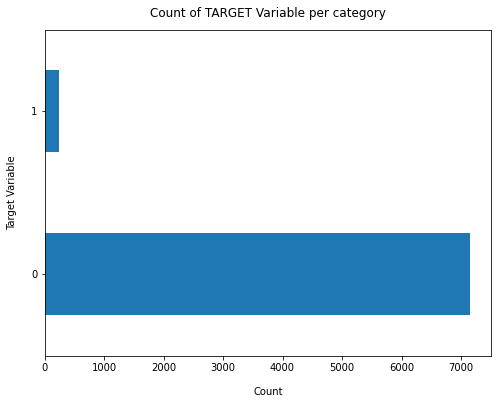

In [59]:
df['Target'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

### so clearly an imbalanced class we have, we will have to balance it else our model will be biased and give poor recall/precision

In [60]:
df.corr()['Target']

physician_id                      -0.013123
physician_efficiency               0.604734
physician_graduation_year         -0.001178
bump_feature                       0.307643
engineered_feature_1               0.139954
engineered_feature_2               0.104671
engineered_feature_3               0.228006
medicare_engineered_1              0.034040
medicare_engineered_2              0.028716
medicare_engineered_3             -0.004909
medicare_enginerred_4             -0.016654
medicare_engineered_5              0.025681
medicare_engineered_6              0.038188
num_medicare_patients             -0.023320
medicare_patient_hcc_risk_score    0.096066
Target                             1.000000
Name: Target, dtype: float64

### So we see that features like 'physician_id','graduation_year'medicare features, num_medicare patients' are weakly correlated and hence can be removed

In [63]:
del_cols = ['physician_id','physician_graduation_year','medicare_engineered_1','medicare_engineered_2','medicare_engineered_3','medicare_enginerred_4',
            'medicare_engineered_5','medicare_engineered_6','num_medicare_patients']

In [65]:
df = df.drop(del_cols,axis = 1)

In [66]:
df.shape

(7393, 12)

In [67]:
df.head()

,physician_efficiency,metro_area,physician_working_specialty,physician_gender,physician_credential,physician_med_school,bump_feature,engineered_feature_1,engineered_feature_2,engineered_feature_3,medicare_patient_hcc_risk_score,Target
0,0.10,Chicago,Nephrology,M,UNKNOWN,OTHER,12,1.004,1.361,9.7,5.328,0
1,0.12,Chicago,Hospital Based Physician,M,UNKNOWN,OTHER,15,0.662,0.901,6.0,2.057,0
2,0.12,Chicago,Nephrology,F,UNKNOWN,OTHER,16,0.227,1.148,0.4,5.472,0
3,0.12,Chicago,Nephrology,F,UNKNOWN,"LOYOLA UNIVERSITY OF CHICAGO, STRITCH SCHOOL O...",14,0.135,1.060,1.4,6.300,0
4,0.13,Dallas,Nephrology,F,UNKNOWN,OTHER,17,1.096,1.100,3.3,3.445,0


In [68]:
df = df.drop(['physician_efficiency'],axis=1)

In [69]:
df.shape

(7393, 11)

In [70]:
df = df.drop(['bump_feature'],axis=1)

In [71]:
df.shape

(7393, 10)

### Lets look for missing values in dataset

In [73]:
df.isnull().sum()

metro_area                         0
physician_working_specialty        0
physician_gender                   0
physician_credential               0
physician_med_school               0
engineered_feature_1               0
engineered_feature_2               0
engineered_feature_3               0
medicare_patient_hcc_risk_score    0
Target                             0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


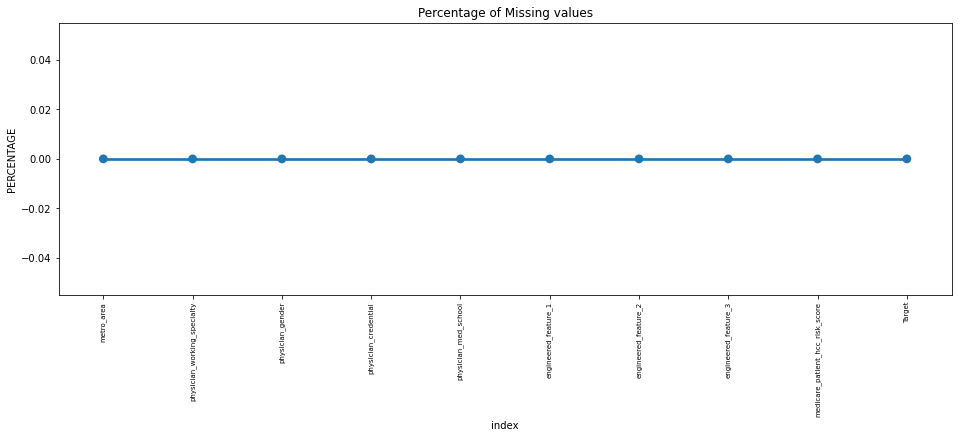

In [74]:
# Having a look that data contains missing values or not
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### We dont have any missing values, so good to go

### Lets check for numerical and categorical features of our dataset

In [77]:
object_df = df.select_dtypes(include='object')
num_df = df.select_dtypes(exclude='object')

In [78]:
object_df.head()

,metro_area,physician_working_specialty,physician_gender,physician_credential,physician_med_school
0,Chicago,Nephrology,M,UNKNOWN,OTHER
1,Chicago,Hospital Based Physician,M,UNKNOWN,OTHER
2,Chicago,Nephrology,F,UNKNOWN,OTHER
3,Chicago,Nephrology,F,UNKNOWN,"LOYOLA UNIVERSITY OF CHICAGO, STRITCH SCHOOL O..."
4,Dallas,Nephrology,F,UNKNOWN,OTHER


In [79]:
object_df.isnull().sum()

metro_area                     0
physician_working_specialty    0
physician_gender               0
physician_credential           0
physician_med_school           0
dtype: int64

In [80]:
num_df.head()

,engineered_feature_1,engineered_feature_2,engineered_feature_3,medicare_patient_hcc_risk_score,Target
0,1.004,1.361,9.7,5.328,0
1,0.662,0.901,6.0,2.057,0
2,0.227,1.148,0.4,5.472,0
3,0.135,1.060,1.4,6.300,0
4,1.096,1.100,3.3,3.445,0


In [81]:
num_df.isnull().sum()

engineered_feature_1               0
engineered_feature_2               0
engineered_feature_3               0
medicare_patient_hcc_risk_score    0
Target                             0
dtype: int64

### one-hot encoding for object_df

In [82]:
df_object_dummies = pd.get_dummies(object_df,drop_first= True)

In [83]:
df_object_dummies.head()

,metro_area_Dallas,physician_working_specialty_Anesthesiology,physician_working_specialty_Cardiovascular - Interventional,physician_working_specialty_Cardiovascular - Non-interventional,physician_working_specialty_Child & Adolescent Psychiatry,physician_working_specialty_Clinical Cardiac Electrophysiology,physician_working_specialty_Clinical Psychology,physician_working_specialty_Colon-Rectal Surgery,physician_working_specialty_Critical Care Medicine,physician_working_specialty_Dermatology,...,physician_med_school_UNIVERSITY OF TEXAS MEDICAL SCHOOL AT HOUSTON,physician_med_school_UNIVERSITY OF TEXAS MEDICAL SCHOOL AT SAN ANTONIO,physician_med_school_UNIVERSITY OF TEXAS SOUTHWESTERN MEDICAL SCHOOL AT DALLAS,physician_med_school_UNIVERSITY OF VIRGINIA SCHOOL OF MEDICINE,physician_med_school_UNIVERSITY OF WISCONSIN MEDICAL SCHOOL,physician_med_school_UNKNOWN,physician_med_school_VANDERBILT UNIVERSITY SCHOOL OF MEDICINE,physician_med_school_WASHINGTON UNIVERSITY SCHOOL OF MEDICINE,physician_med_school_WAYNE STATE UNIVERSITY SCHOOL OF MEDICINE,physician_med_school_YALE UNIVERSITY SCHOOL OF MEDICINE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
final_df = pd.concat([num_df,df_object_dummies],axis=1)
final_df.head(10)

,engineered_feature_1,engineered_feature_2,engineered_feature_3,medicare_patient_hcc_risk_score,Target,metro_area_Dallas,physician_working_specialty_Anesthesiology,physician_working_specialty_Cardiovascular - Interventional,physician_working_specialty_Cardiovascular - Non-interventional,physician_working_specialty_Child & Adolescent Psychiatry,...,physician_med_school_UNIVERSITY OF TEXAS MEDICAL SCHOOL AT HOUSTON,physician_med_school_UNIVERSITY OF TEXAS MEDICAL SCHOOL AT SAN ANTONIO,physician_med_school_UNIVERSITY OF TEXAS SOUTHWESTERN MEDICAL SCHOOL AT DALLAS,physician_med_school_UNIVERSITY OF VIRGINIA SCHOOL OF MEDICINE,physician_med_school_UNIVERSITY OF WISCONSIN MEDICAL SCHOOL,physician_med_school_UNKNOWN,physician_med_school_VANDERBILT UNIVERSITY SCHOOL OF MEDICINE,physician_med_school_WASHINGTON UNIVERSITY SCHOOL OF MEDICINE,physician_med_school_WAYNE STATE UNIVERSITY SCHOOL OF MEDICINE,physician_med_school_YALE UNIVERSITY SCHOOL OF MEDICINE
0,1.004,1.361,9.7,5.328,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.662,0.901,6.0,2.057,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.227,1.148,0.4,5.472,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.135,1.060,1.4,6.300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.096,1.100,3.3,3.445,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.821,0.868,13.7,4.850,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.838,1.155,14.9,5.318,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,1.087,1.092,5.9,5.826,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,1.028,1.087,8.3,1.806,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
9,0.232,0.495,6.6,3.893,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
final_df.columns

Index(['engineered_feature_1', 'engineered_feature_2', 'engineered_feature_3',
       'medicare_patient_hcc_risk_score', 'Target', 'metro_area_Dallas',
       'physician_working_specialty_Anesthesiology',
       'physician_working_specialty_Cardiovascular - Interventional',
       'physician_working_specialty_Cardiovascular - Non-interventional',
       'physician_working_specialty_Child & Adolescent Psychiatry',
       ...
       'physician_med_school_UNIVERSITY OF TEXAS MEDICAL SCHOOL AT HOUSTON',
       'physician_med_school_UNIVERSITY OF TEXAS MEDICAL SCHOOL AT SAN ANTONIO',
       'physician_med_school_UNIVERSITY OF TEXAS SOUTHWESTERN MEDICAL SCHOOL AT DALLAS',
       'physician_med_school_UNIVERSITY OF VIRGINIA SCHOOL OF MEDICINE',
       'physician_med_school_UNIVERSITY OF WISCONSIN MEDICAL SCHOOL',
       'physician_med_school_UNKNOWN',
       'physician_med_school_VANDERBILT UNIVERSITY SCHOOL OF MEDICINE',
       'physician_med_school_WASHINGTON UNIVERSITY SCHOOL OF MEDICINE',

---------- metro_area ----------
Chicago    5238
Dallas     2155
Name: metro_area, dtype: int64
---------- physician_working_specialty ----------
Family Practice                        1031
Internal Medicine                      1001
OB/GYN                                  470
Emergency Medicine                      323
Cardiovascular - Non-interventional     282
                                       ... 
Pediatric Surgery                         1
Pediatric Otolaryngology                  1
Otology                                   1
Reproductive Endocrinology                1
Pediatric Neurology                       1
Name: physician_working_specialty, Length: 68, dtype: int64
---------- physician_gender ----------
M    3449
F    3246
U     698
Name: physician_gender, dtype: int64
---------- physician_credential ----------
UNKNOWN    4355
MD         2846
DO          158
CP           33
OD            1
Name: physician_credential, dtype: int64
---------- physician_med_school --------

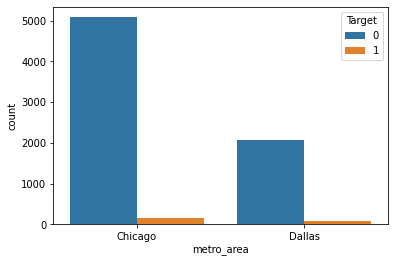

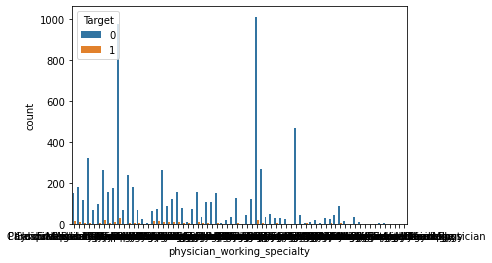

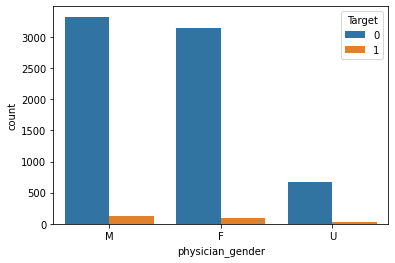

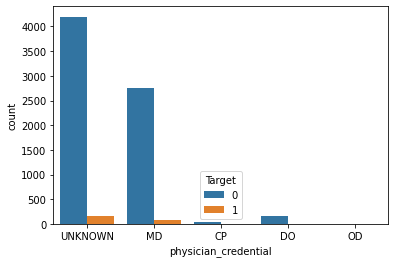

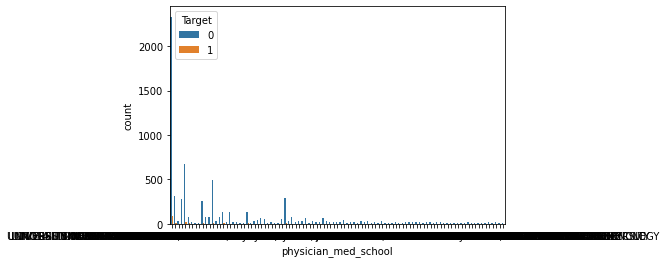

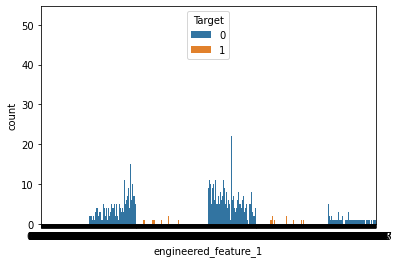

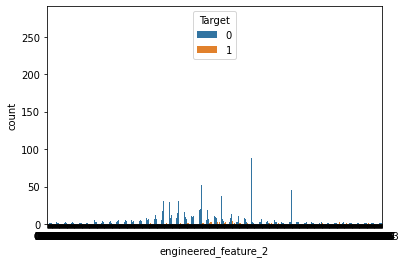

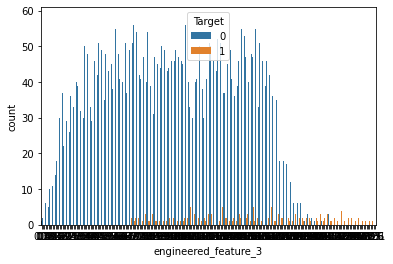

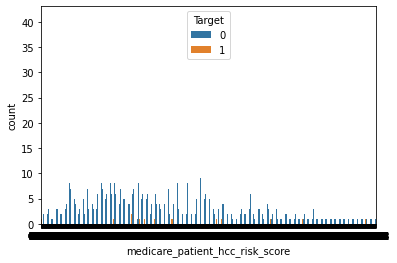

In [87]:
#having a loook into the values of count of each columns and there count in respect to Target column
for i, predictor in enumerate(df.drop(columns=['Target'])):
    print('-'*10,predictor,'-'*10)
    print(df[predictor].value_counts())    
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Target')

In [89]:
new_df_target0=df.loc[df["Target"]==0] # inefficient
new_df_target1=df.loc[df["Target"]==1] # efficient Physician

In [90]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

In [91]:
object_df.columns

Index(['metro_area', 'physician_working_specialty', 'physician_gender',
       'physician_credential', 'physician_med_school'],
      dtype='object')

<Figure size 2250x1500 with 0 Axes>

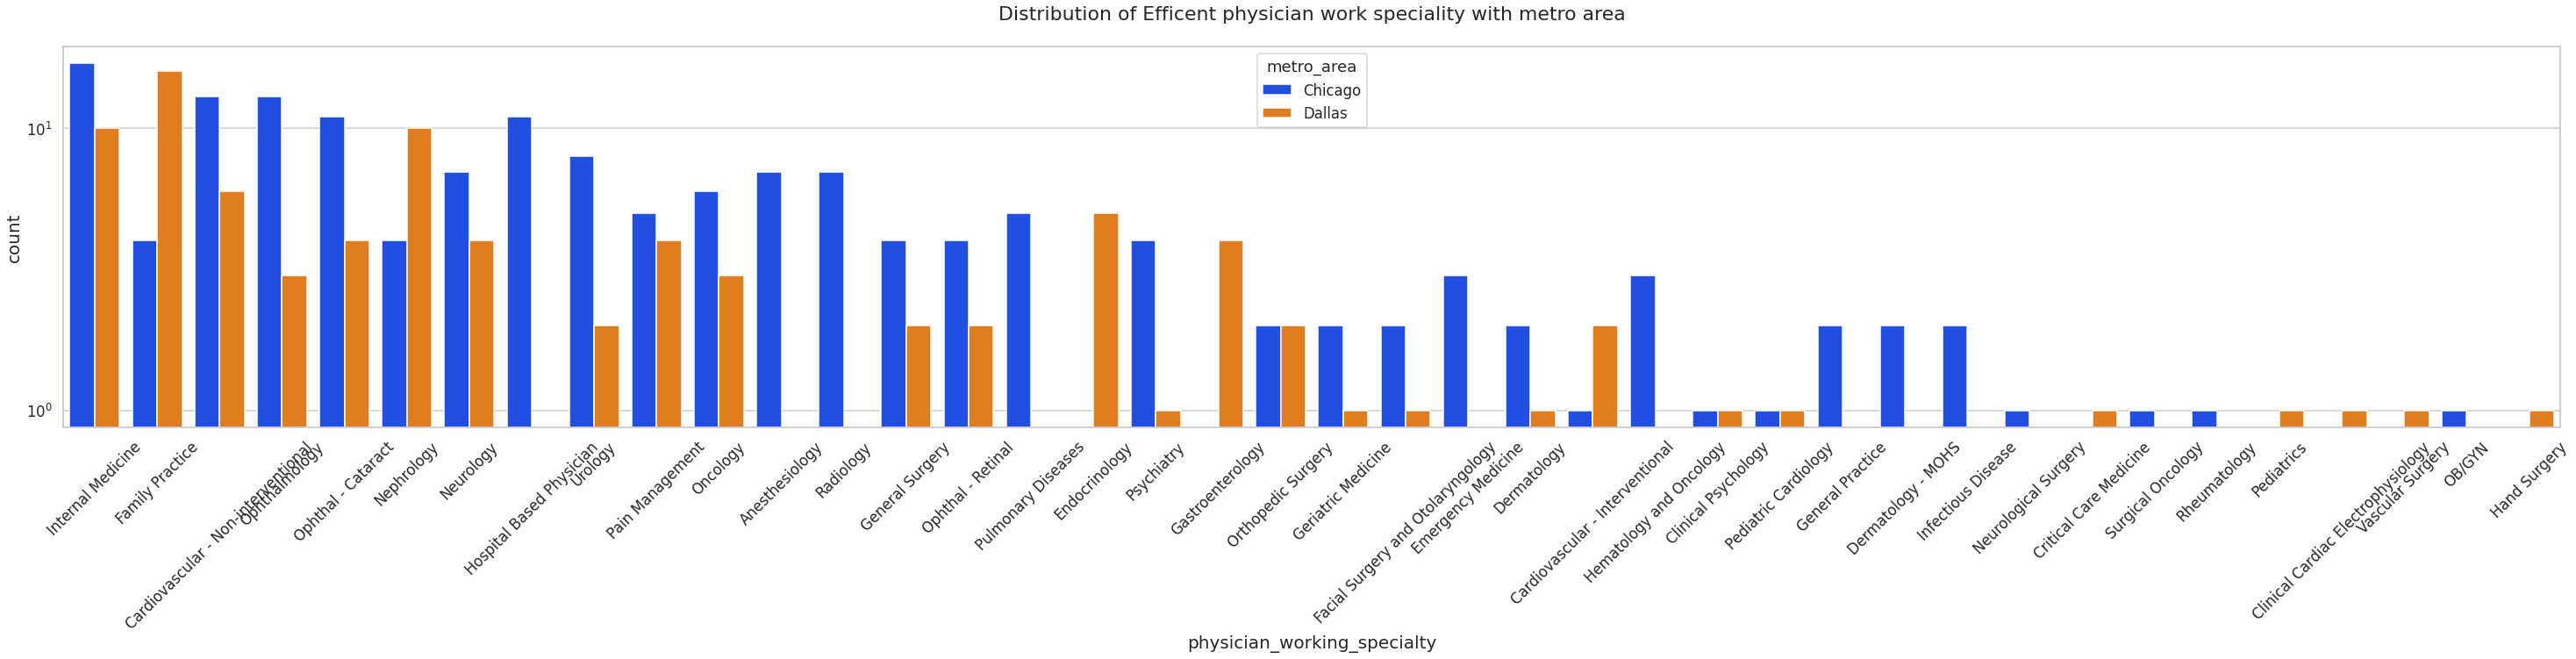

In [151]:
plt.figure(figsize=(15,10),dpi=150)
uniplot(new_df_target1,col='physician_working_specialty',title='Distribution of Efficent physician work speciality with metro area',hue='metro_area')

### we observe that most of the efficient physicians have internal medicine, cardiovascular, catarct and nephro and neuro domain

<Figure size 2250x1500 with 0 Axes>

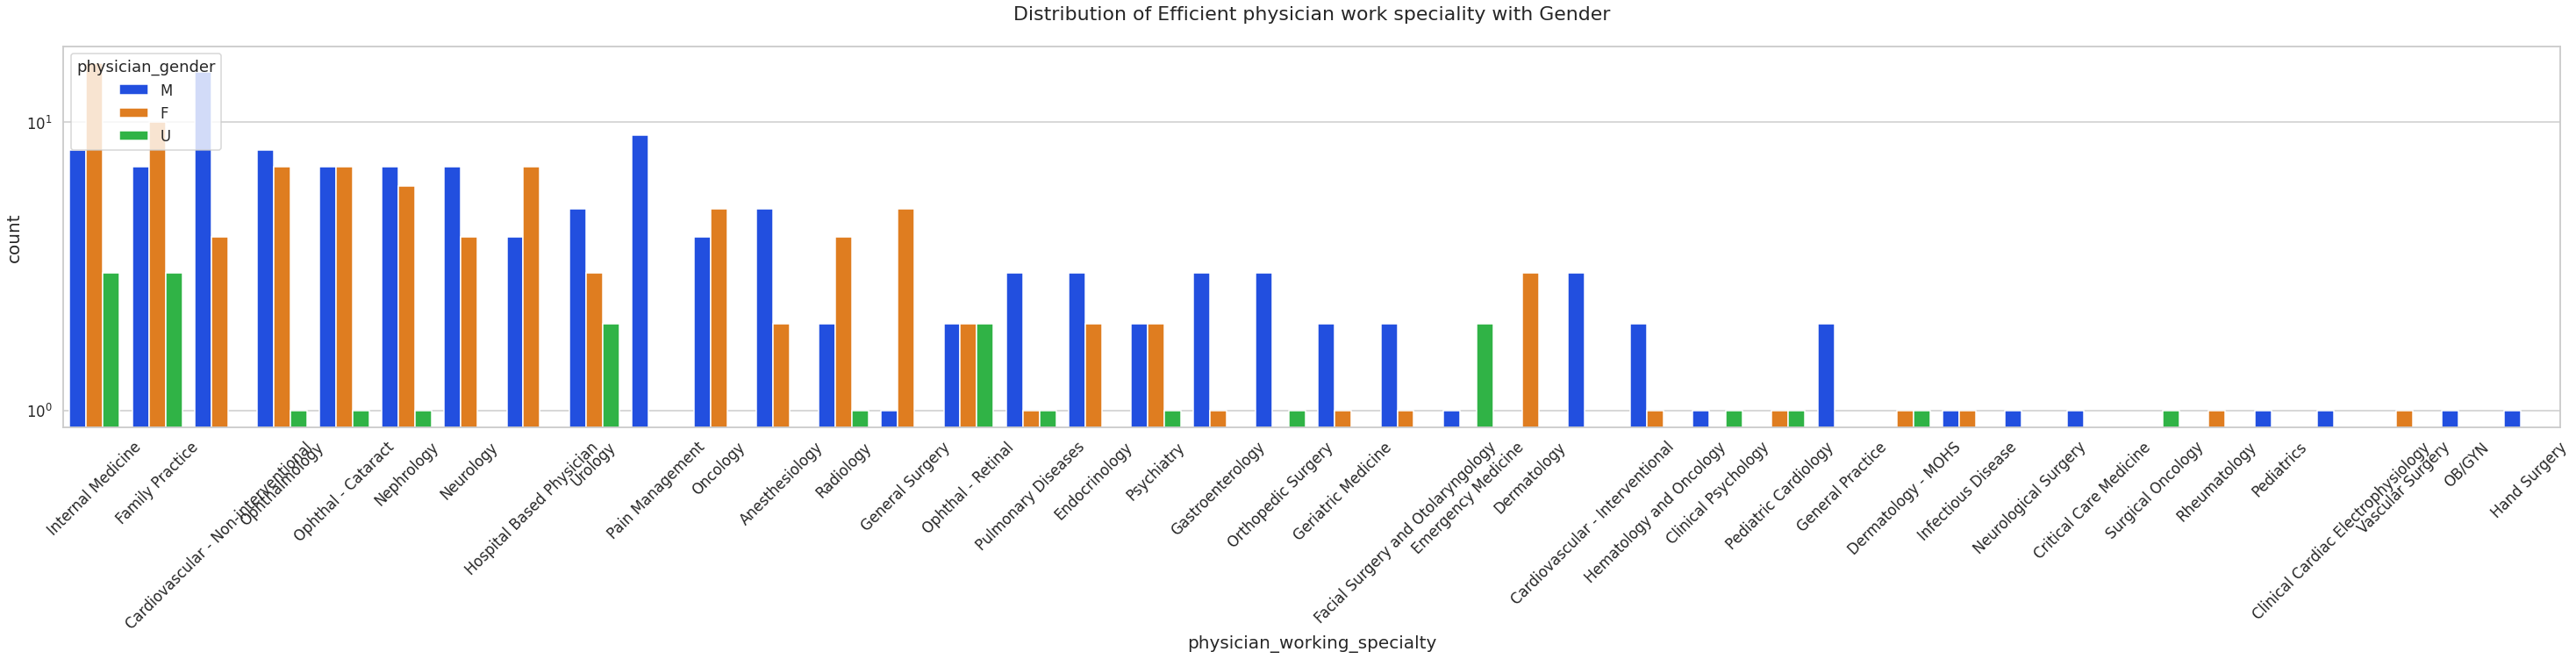

In [153]:
plt.figure(figsize=(15,10),dpi=150)
uniplot(new_df_target1,col='physician_working_specialty',title='Distribution of Efficient physician work speciality with Gender',hue='physician_gender')

<Figure size 2250x1500 with 0 Axes>

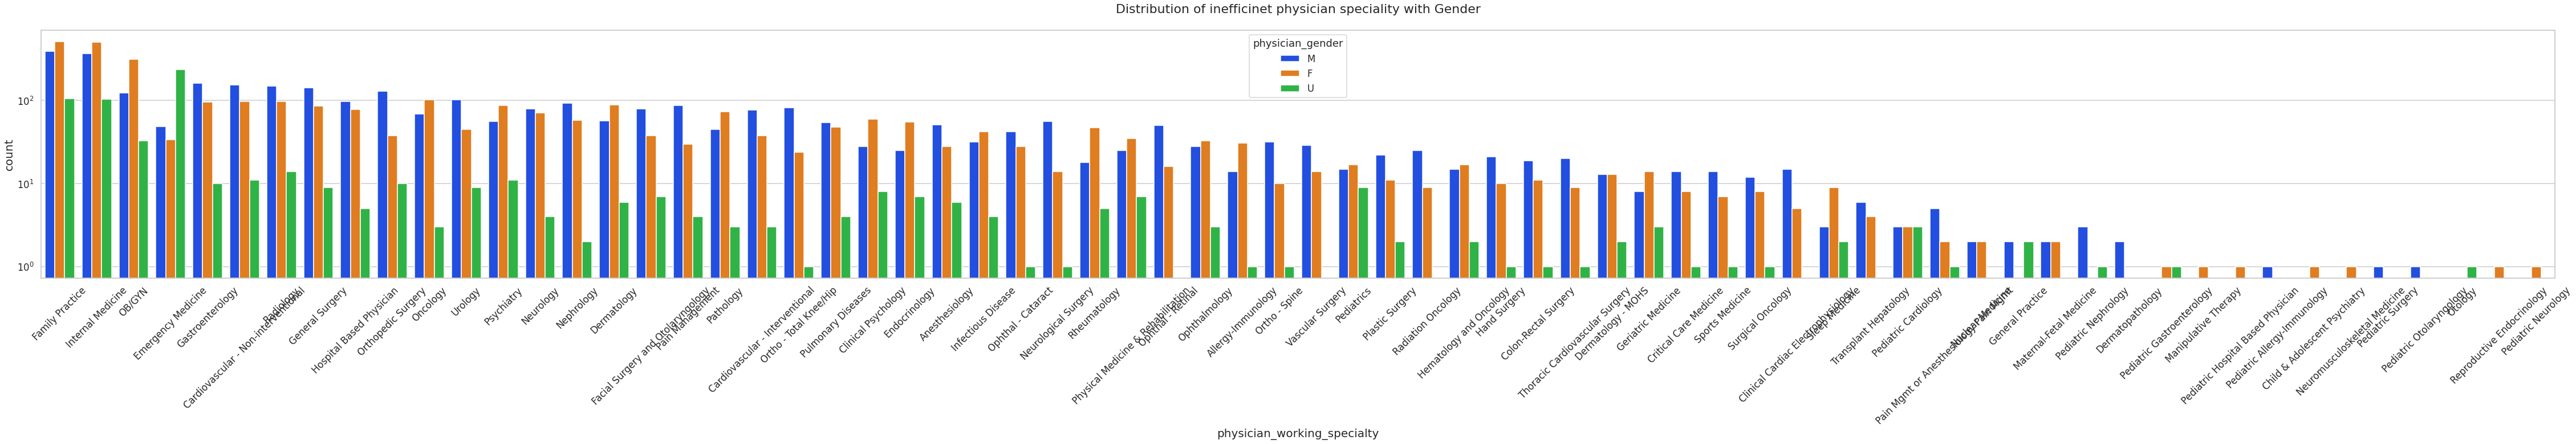

In [154]:
plt.figure(figsize=(15,10),dpi=150)
uniplot(new_df_target0,col='physician_working_specialty',title='Distribution of inefficinet physician speciality with Gender',hue='physician_gender')

<Figure size 3750x3000 with 0 Axes>

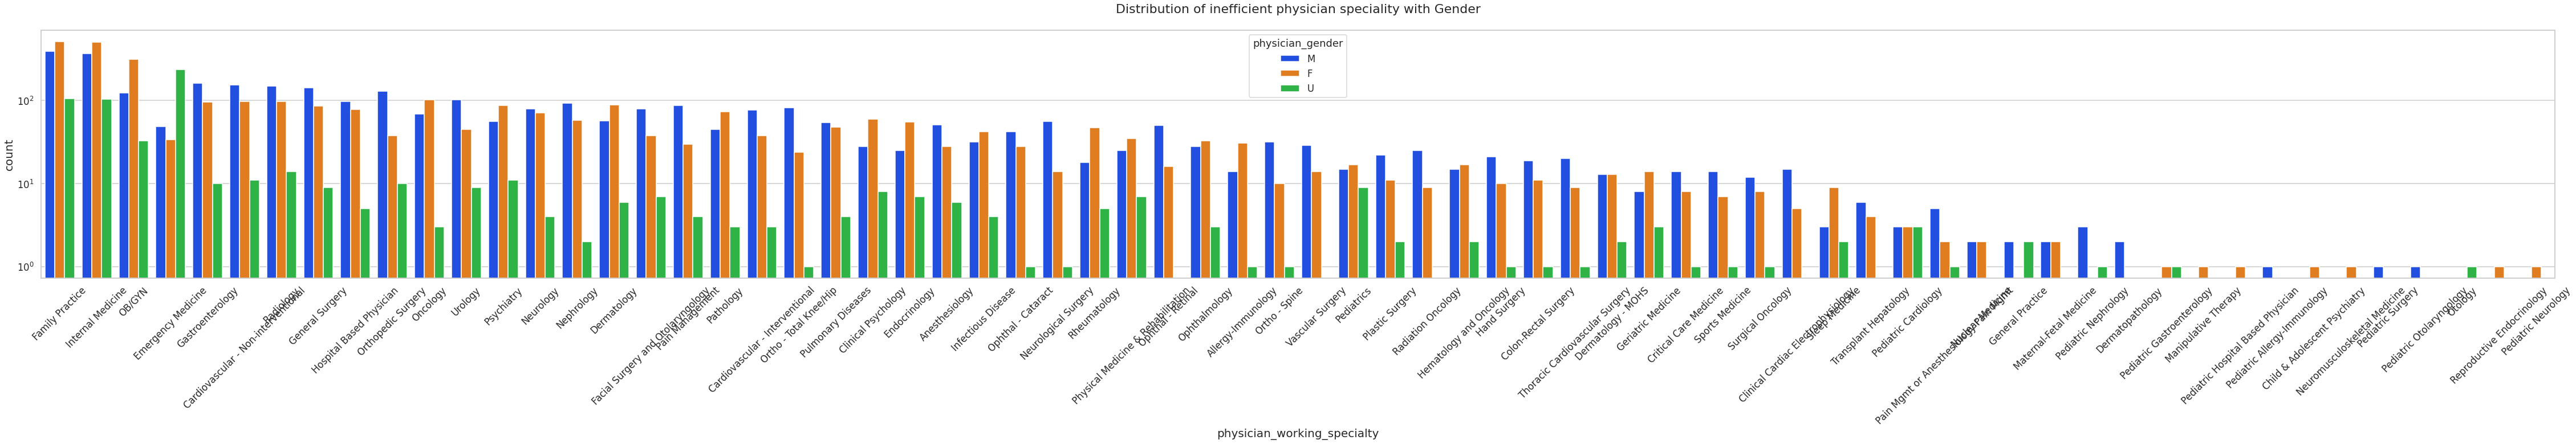

In [155]:
plt.figure(figsize=(25,20),dpi=150)
uniplot(new_df_target0,col='physician_working_specialty',title='Distribution of inefficient physician speciality with Gender',hue='physician_gender')

<Figure size 2250x1500 with 0 Axes>

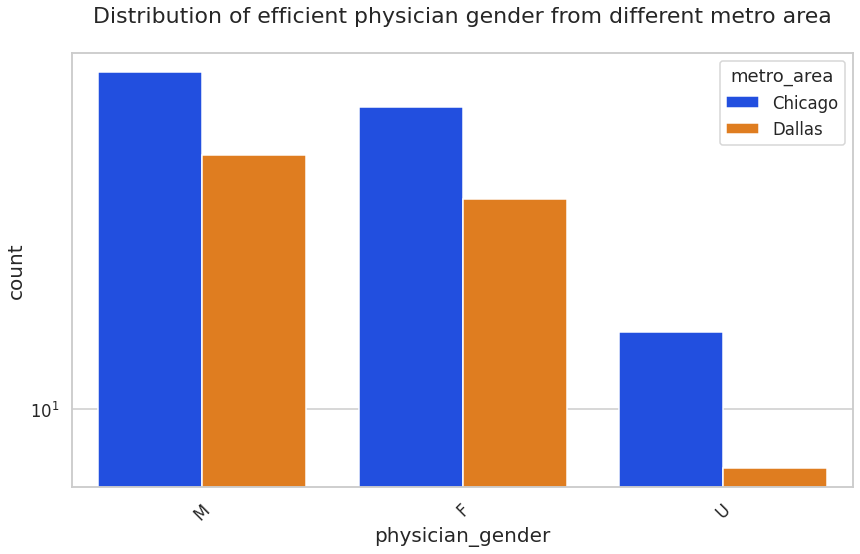

In [102]:
plt.figure(figsize=(15,10),dpi=150)
uniplot(new_df_target1,col='physician_gender',title='Distribution of efficient physician gender from different metro area',hue='metro_area')

<Figure size 2250x1500 with 0 Axes>

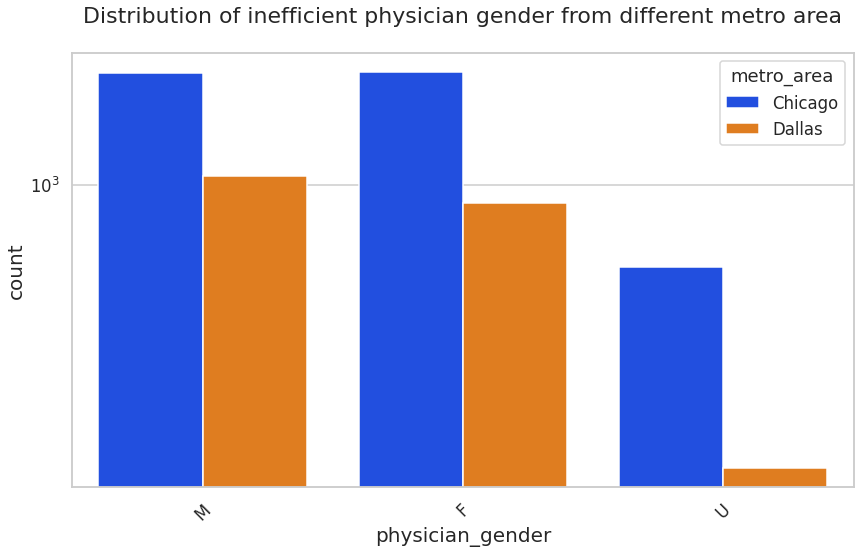

In [103]:
plt.figure(figsize=(15,10),dpi=150)
uniplot(new_df_target0,col='physician_gender',title='Distribution of inefficient physician gender from different metro area',hue='metro_area')

In [104]:
## lets create the ML model

In [105]:
final_df.columns

Index(['engineered_feature_1', 'engineered_feature_2', 'engineered_feature_3',
       'medicare_patient_hcc_risk_score', 'Target', 'metro_area_Dallas',
       'physician_working_specialty_Anesthesiology',
       'physician_working_specialty_Cardiovascular - Interventional',
       'physician_working_specialty_Cardiovascular - Non-interventional',
       'physician_working_specialty_Child & Adolescent Psychiatry',
       ...
       'physician_med_school_UNIVERSITY OF TEXAS MEDICAL SCHOOL AT HOUSTON',
       'physician_med_school_UNIVERSITY OF TEXAS MEDICAL SCHOOL AT SAN ANTONIO',
       'physician_med_school_UNIVERSITY OF TEXAS SOUTHWESTERN MEDICAL SCHOOL AT DALLAS',
       'physician_med_school_UNIVERSITY OF VIRGINIA SCHOOL OF MEDICINE',
       'physician_med_school_UNIVERSITY OF WISCONSIN MEDICAL SCHOOL',
       'physician_med_school_UNKNOWN',
       'physician_med_school_VANDERBILT UNIVERSITY SCHOOL OF MEDICINE',
       'physician_med_school_WASHINGTON UNIVERSITY SCHOOL OF MEDICINE',

### Building logistic regression model first

In [107]:
from sklearn.model_selection import train_test_split
X = final_df.drop('Target',axis=1)
y = final_df['Target']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### we have seen before our dataset has class imbalance so we need to take care of the balancing part while creating model

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,classification_report

In [111]:
logreg = LogisticRegression(random_state = 13,class_weight = 'balanced') ## using class balance weights to balance the data

In [112]:
logreg.fit(X_train,y_train) 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=13)

In [113]:
y_pred = logreg.predict(X_test) # predict on test data
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test)) # ROC AUC score
print(classification_report(y_test, y_pred)) 
print("The area under the curve is: %0.2f"%logit_roc_auc) # AUC curve

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      2139
           1       0.13      0.67      0.21        79

    accuracy                           0.82      2218
   macro avg       0.56      0.75      0.56      2218
weighted avg       0.95      0.82      0.87      2218

The area under the curve is: 0.75


### we see that AUC curve is 75% with recall as 67% for our target-1

In [114]:
y_pred_prob = logreg.predict_proba(X_test)

In [115]:
y_pred_prob = y_pred_prob[:, 1]

In [117]:
from sklearn.metrics import roc_curve
# Create the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
df_fpr_tpr.head()

,FPR,TPR,Threshold
0,0.000000,0.000000,2.000000
1,0.000468,0.000000,1.000000
2,0.000935,0.000000,1.000000
3,0.000935,0.088608,0.995994
4,0.003273,0.088608,0.991038


In [118]:
from plotnine import *
import plotnine


### since its an imbalanced dataset so we calculate gmean = sqrt(tpr*(1-fpr))

Best Threshold: 0.3783 with G-Mean: 0.7626
FPR: 0.2342, TPR: 0.7595


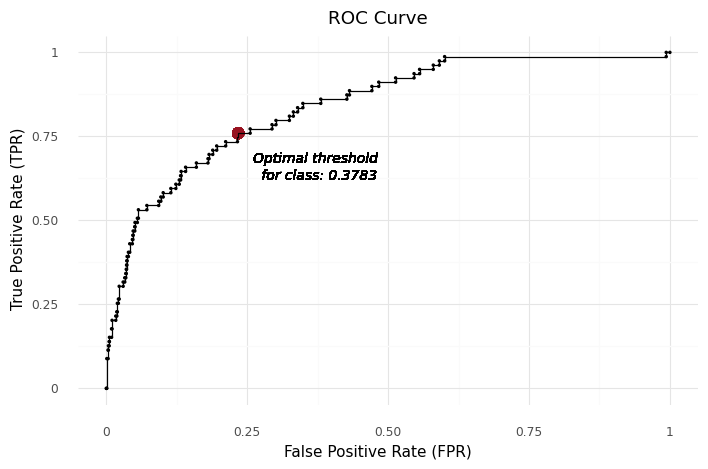

<ggplot: (8744080003193)>

In [119]:
gmean = np.sqrt(tpr * (1 - fpr))

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

# Create data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

In [120]:
thresholdOpt

0.3783

### so we see opt-threshold at 0.3783

In [121]:
k1 = pd.Series(y_pred_prob)
y_pred_probs = k1.map(lambda x: 1 if x > thresholdOpt else 0)

In [122]:
logit_roc_auc = roc_auc_score(y_test, y_pred_probs) # ROC AUC score
print(classification_report(y_test, y_pred_probs)) 
print("The area under the curve is: %0.2f"%logit_roc_auc) # AUC curve

              precision    recall  f1-score   support

           0       0.99      0.77      0.86      2139
           1       0.11      0.76      0.19        79

    accuracy                           0.77      2218
   macro avg       0.55      0.76      0.53      2218
weighted avg       0.96      0.77      0.84      2218

The area under the curve is: 0.76


### clearly we see that accuracy as well recall(sensiitivity) improved when making prediction against the threshold/ROC-optimal cut off point

## Building the model using Ensemble learning- Bagging (Random Forest) 

In [123]:
from sklearn.ensemble import RandomForestClassifier

Hypeparameters for tuning

In [124]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [125]:
randomforest = RandomForestClassifier()

In [126]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = randomforest,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [127]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [128]:
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}  



In [134]:
randomforest = RandomForestClassifier(n_estimators = 100, min_samples_split= 2, min_samples_leaf = 1, max_features = 'sqrt',
                                      max_depth =  120, bootstrap =  True, class_weight = 'balanced') # class_weight = balance for handling imabalance data

randomforest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=120,
                       max_features='sqrt')

In [135]:
y_pred = randomforest.predict(X_test)
randomforest_roc_auc = roc_auc_score(y_test, randomforest.predict(X_test))
print(classification_report(y_test, y_pred))
print("The area under the curve is: %0.2f"%randomforest_roc_auc)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2139
           1       0.88      0.09      0.16        79

    accuracy                           0.97      2218
   macro avg       0.92      0.54      0.57      2218
weighted avg       0.96      0.97      0.95      2218

The area under the curve is: 0.54


In [136]:
y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]

# Create the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
df_fpr_tpr.head()

,FPR,TPR,Threshold
0,0.000000,0.000000,2.000000
1,0.000468,0.000000,1.000000
2,0.000935,0.000000,1.000000
3,0.000935,0.088608,0.995994
4,0.003273,0.088608,0.991038


Best Threshold: 0.3783 with G-Mean: 0.7626
FPR: 0.2342, TPR: 0.7595


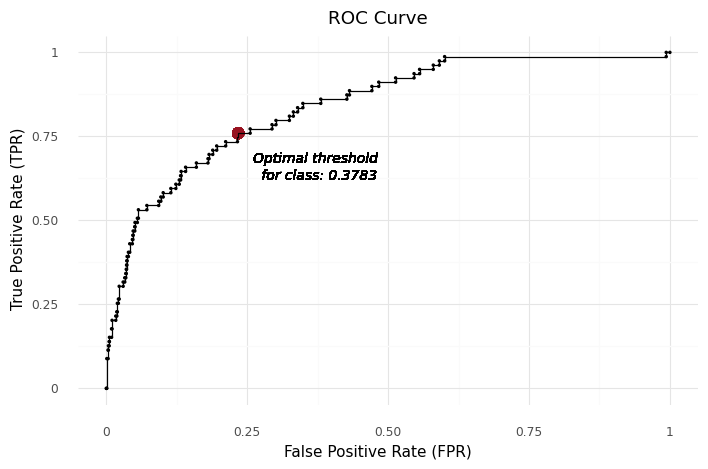

<ggplot: (8744086779543)>

In [137]:
mean = np.sqrt(tpr * (1 - fpr))

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

# Create data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

In [138]:
k1 = pd.Series(y_pred_prob)
y_pred_probs = k1.map(lambda x: 1 if x > thresholdOpt else 0)

randomforest_roc_auc = roc_auc_score(y_test, y_pred_probs) # ROC AUC score
print(classification_report(y_test, y_pred_probs)) 
print("The area under the curve is: %0.2f"%randomforest_roc_auc) # AUC curve

              precision    recall  f1-score   support

           0       0.99      0.77      0.86      2139
           1       0.11      0.76      0.19        79

    accuracy                           0.77      2218
   macro avg       0.55      0.76      0.53      2218
weighted avg       0.96      0.77      0.84      2218

The area under the curve is: 0.76


### we see that with Random Forest accuracy is 77% and recall 76%

## Lets try one of the boosting models too- Adaboost

In [141]:
from sklearn import tree
from imblearn.over_sampling import SMOTE

In [142]:
from sklearn.ensemble import AdaBoostClassifier

### Lets try the SMOTE technqique this time to balance the dataset

In [143]:
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train) 

In [144]:
adaboost = AdaBoostClassifier(n_estimators = 100)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [145]:
y_pred = adaboost.predict(X_test)
adaboost_roc_auc = roc_auc_score(y_test, adaboost.predict(X_test))
print(classification_report(y_test, y_pred))
print("The area under the curve is: %0.2f"%adaboost_roc_auc)

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      2139
           1       0.23      0.54      0.33        79

    accuracy                           0.92      2218
   macro avg       0.61      0.74      0.64      2218
weighted avg       0.96      0.92      0.93      2218

The area under the curve is: 0.74


In [156]:
y_pred_prob = adaboost.predict_proba(X_test)

In [157]:
y_pred_prob = y_pred_prob[:, 1]
# Create the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
df_fpr_tpr.head()

,FPR,TPR,Threshold
0,0.000000,0.000000,1.608967
1,0.000000,0.012658,0.608967
2,0.000000,0.189873,0.587905
3,0.000468,0.189873,0.512001
4,0.000468,0.202532,0.511493


Best Threshold: 0.4969 with G-Mean: 0.7626
FPR: 0.136, TPR: 0.6329


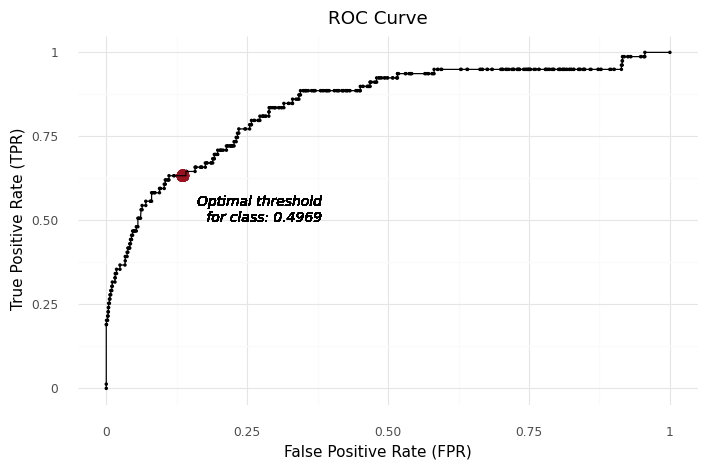

<ggplot: (8744080246071)>

In [158]:
mean = np.sqrt(tpr * (1 - fpr))

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

# Create data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

In [159]:
k1 = pd.Series(y_pred_prob)
y_pred_probs = k1.map(lambda x: 1 if x > thresholdOpt else 0)

adaboost_roc_auc = roc_auc_score(y_test, y_pred_probs) # ROC AUC score
print(classification_report(y_test, y_pred_probs)) 
print("The area under the curve is: %0.2f"%adaboost_roc_auc) # AUC curve

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      2139
           1       0.15      0.63      0.24        79

    accuracy                           0.86      2218
   macro avg       0.57      0.75      0.58      2218
weighted avg       0.95      0.86      0.90      2218

The area under the curve is: 0.75


### we observe that area under curve as 75% and recall 63% with 86% accuracy

## Observations
1. So we saw physician_efficiency and bump_feature as highly correlated features and created a target variable from their insights of 
1s(Efficinet) and 0s(Non-efficient) physicians

2. We found that dataset is class imbalance(like we have very less number of 1s than 0s). So in order prevent our model
from being biased we applied class_weights and SMOTE techniques to balance the dataset

3. There were no missing values in the data

4. We removed unnecessary features who had weak correlation with the Target Variable

5. Peformed various data analysis and visualization plots to show relationship between different features

6. Built Logistic Regression, Random Forest and Adaboost models keeping in mind accuracy, Area under ROC curve and recall.

7. Random Forest in general performed better.

```
# This is formatted as code
```



In [160]:
df_test = pd.read_csv('/content/sample_data/l2_data.csv')

In [161]:
df_test.head()

,physician_id,physician_efficiency,metro_area,physician_working_specialty,physician_gender,physician_credential,physician_med_school,physician_graduation_year,bump_feature,engineered_feature_1,engineered_feature_2,engineered_feature_3,medicare_engineered_1,medicare_engineered_2,medicare_engineered_3,medicare_enginerred_4,medicare_engineered_5,medicare_engineered_6,num_medicare_patients,medicare_patient_hcc_risk_score
0,866,0.10,Chicago,Nephrology,M,UNKNOWN,OTHER,2008.0,12,1.004,1.361,9.7,3.25,3,5,2,1,5,228,5.328
1,4766,0.12,Chicago,Hospital Based Physician,M,UNKNOWN,OTHER,1982.0,15,0.662,0.901,6.0,4.00,4,2,5,5,4,372,2.057
2,7088,0.12,Chicago,Nephrology,F,UNKNOWN,OTHER,2004.0,16,0.227,1.148,0.4,2.75,3,1,4,2,4,339,5.472
3,2808,0.12,Chicago,Nephrology,F,UNKNOWN,"LOYOLA UNIVERSITY OF CHICAGO, STRITCH SCHOOL O...",2013.0,14,0.135,1.060,1.4,4.00,4,3,4,4,5,358,6.300
4,4040,0.13,Dallas,Nephrology,F,UNKNOWN,OTHER,1979.0,17,1.096,1.100,3.3,3.00,3,1,5,4,2,219,3.445


In [166]:
df_test[df_test['physician_efficiency'] == df_test['physician_efficiency'].max()] # so physician with 9092 is most efficient

,physician_id,physician_efficiency,metro_area,physician_working_specialty,physician_gender,physician_credential,physician_med_school,physician_graduation_year,bump_feature,engineered_feature_1,engineered_feature_2,engineered_feature_3,medicare_engineered_1,medicare_engineered_2,medicare_engineered_3,medicare_enginerred_4,medicare_engineered_5,medicare_engineered_6,num_medicare_patients,medicare_patient_hcc_risk_score
7392,9092,2.99,Chicago,Anesthesiology,M,UNKNOWN,OTHER,2004.0,9951,0.804,1.164,16.7,3.5,4,0,3,0,4,148,1.174


In [170]:
(df_test[(df_test['physician_working_specialty'] == 'Family Practice') & (df_test['metro_area'] == 'Chicago')]['physician_graduation_year']).median()

2003.0

### The average graduation year of all physicians that have a “Family Practice” working specialty and are located in the Chicago metro area is 2003